#Task 2
To predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied.

Various packages are imported

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

##The data set is read and stored in a dataframe

In [208]:
df = pd.read_csv("StudentScore.csv")

##Description of the data

In [209]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [210]:
df.shape

(25, 2)

In [211]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


##Data Visualization


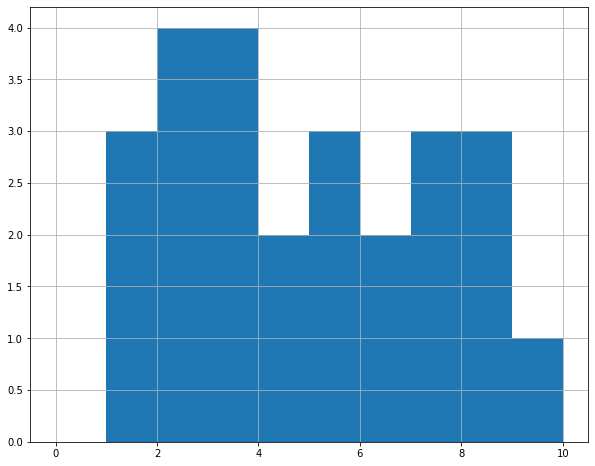

In [212]:
df['Hours'].hist(figsize=(10,8),bins=[0,1,2,3,4,5,6,7,8,9,10])


Histogram plot shows the count of a range of values in the feature

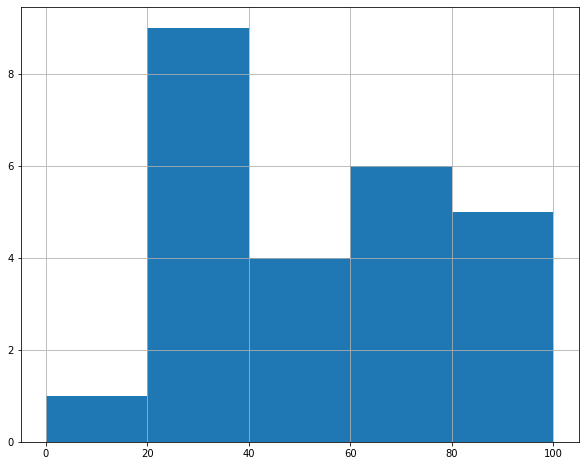

In [213]:
df['Scores'].hist(figsize=(10,8),bins=[0,20,40,60,80,100])

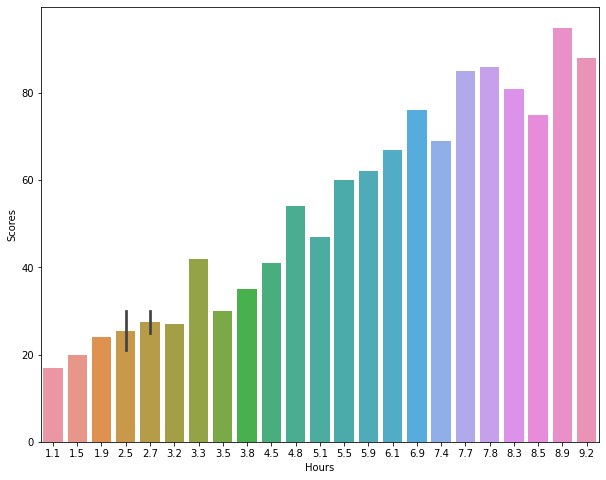

In [214]:
fig , ax = plt.subplots(figsize=(10,8))
sns.barplot(x=df['Hours'],y=df['Scores'],ax=ax)
plt.show()

The bar plot shows how Score is increasing as the hours increase

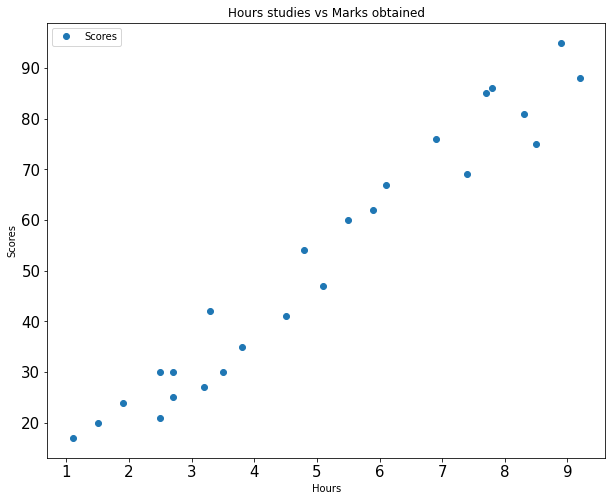

In [215]:
df.plot(x='Hours',y='Scores',style='o',figsize=(10,8),fontsize=15)
plt.title("Hours studies vs Marks obtained")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

Scatter plot shows that the relation between the features can be modeled using a Linear regression 

Correlation of features


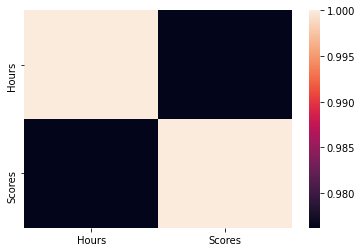

In [216]:
print("Correlation of features")
sns.heatmap(data=df.corr())


Heat Map visualizes the correlation between Hours and Scores

##Preparing the dataset to train the model

In [217]:
X = df.iloc[:,0].values
y = df.iloc[:,1].values

In [218]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [219]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=0)

##Using Linear Regression to fit the model

In [220]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

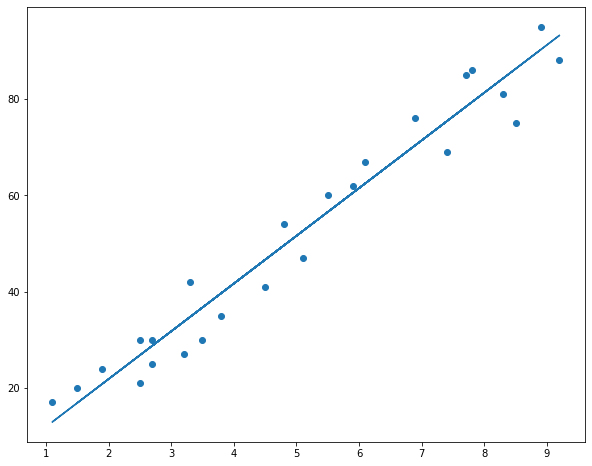

In [221]:
line = reg.coef_*X + reg.intercept_
plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

This plot shows how the linear regression model tries to fit the scattered feature points 

##Prediction of the test data

In [222]:
pred = reg.predict(X_test)

In [223]:
df_pred = pd.DataFrame({'Actual': X_test.reshape(-1,), 'Predicted': pred.reshape(-1,)})
df_pred

,Actual,Predicted
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


##Performance of the model

In [224]:
print("Training Accuracy :",100*reg.score(X_train,y_train).round(4),"%")
print("Testing Accuracy :",100*reg.score(X_test,y_test).round(4),"%")

Training Accuracy : 95.16 %
Testing Accuracy : 94.55 %


In [225]:
MSE = mean_squared_error(y_test,pred)
MAE = mean_absolute_error(y_test,pred)
print("Mean Squared Error :",MSE.round(4))
print("Mean Absolute Error :",MAE.round(4))

Mean Squared Error : 21.5988
Mean Absolute Error : 4.1839
